In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 
#%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#import wordcloud
#from sqlalchemy import create_engine
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import SnowballStemmer, LancasterStemmer,  PorterStemmer,WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import plotly.graph_objects as go
import plotly.express as px
import dateparser

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Femi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Femi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Femi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Femi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Femi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("MI_topics.csv")

In [3]:
df.head()

,Source,Link,Title,Article,Date,tokens_column,lemmas,word_count,unique_word_count,mean_word_length,predicted_topic,predicted_score
0,Markets Insider Automation,https://markets.businessinsider.com/news/stock...,costco wholesale hosts conference call for inv...,the company costco wholesale is set to host in...,2023-05-10,"['company', 'costco', 'wholesale', 'set', 'hos...",company costco wholesale set host investor cli...,112,76,4.705357,FinanceAnalysis,0.719080
1,InvestorPlace,https://markets.businessinsider.com/news/stock...,7 inflation proof stocks to buy for more bank ...,investorplace stock market news stock advice t...,2023-05-09,"['investorplace', 'stock', 'market', 'news', '...",investorplace stock market news stock advice t...,1485,686,5.371044,FinanceAnalysis,0.505355
2,Zacks,https://markets.businessinsider.com/news/stock...,costco cost flat as market gains what you shou...,in the latest trading session costco cost clos...,2023-05-09,"['latest', 'trading', 'session', 'costco', 'co...",late trading session costco cost close 49906 m...,586,305,4.875427,FinanceAnalysis,0.647086
3,Zacks,https://markets.businessinsider.com/news/stock...,the zacks analyst blog highlights exxon mobil ...,for immediate releasechicago il may 8 2023 zac...,2023-05-09,"['immediate', 'releasechicago', 'il', 'may', '...",immediate releasechicago il may 8 2023 zacksco...,888,465,5.489865,FinanceAnalysis,0.674216
4,Zacks,https://markets.businessinsider.com/news/stock...,top analyst reports for exxon mobil costco act...,friday may 5 2023the zacks research daily pres...,2023-05-06,"['friday', 'may', '5', '2023the', 'zacks', 're...",friday may 5 2023the zack research daily prese...,1121,556,5.583408,FinanceAnalysis,0.532896


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Source             2224 non-null   object 
 1   Link               2224 non-null   object 
 2   Title              2224 non-null   object 
 3   Article            2224 non-null   object 
 4   Date               2224 non-null   object 
 5   tokens_column      2224 non-null   object 
 6   lemmas             2224 non-null   object 
 7   word_count         2224 non-null   int64  
 8   unique_word_count  2224 non-null   int64  
 9   mean_word_length   2224 non-null   float64
 10  predicted_topic    2224 non-null   object 
 11  predicted_score    2224 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 208.6+ KB
None


info method to get a quick description of the data, particularly the total number of rows, each attribute’s type, and the number of non-null values

In [6]:
print(df.describe())

        word_count  unique_word_count  mean_word_length  predicted_score
count  2224.000000        2224.000000       2224.000000      2224.000000
mean    727.169514         335.116007          5.232702         0.650817
std     730.649428         242.748479          0.476511         0.128639
min       6.000000           6.000000          3.769231         0.500010
25%     178.750000         119.000000          4.985995         0.538522
50%     566.000000         307.000000          5.166667         0.613409
75%    1005.500000         490.500000          5.403787         0.738916
max    7241.000000        1272.000000         13.000000         0.988574


Describe method gives a statistical summary of the numerical attributes

### Document Length

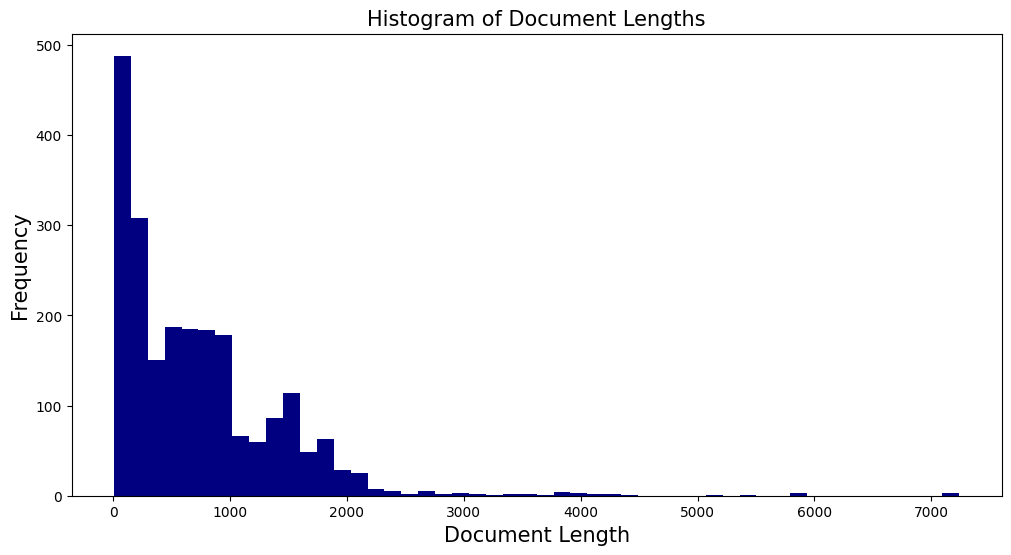

In [11]:
import matplotlib.pyplot as plt

# Calculate the length of each document
df['doc_len'] = df['Article'].apply(lambda x: len(x.split()))

# Plot a histogram of the document lengths
plt.figure(figsize=(12, 6))
plt.hist(df['doc_len'], bins=50, color='navy')
plt.title('Histogram of Document Lengths', fontsize=15)
plt.xlabel('Document Length', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [13]:
import plotly.express as px


# Create the histogram
fig = px.histogram(df, x="doc_len", nbins=50, title='Histogram of Document Lengths')

# Set labels
fig.update_xaxes(title_text='Document Length')
fig.update_yaxes(title_text='Frequency')

# Show the plot
fig.show()


The histogram gives an idea of the distribution of document lengths in the dataset

### Word Counts and Frequency

In [14]:
import plotly.express as px
from collections import Counter
from nltk.corpus import stopwords
import ast


stop_words = set(stopwords.words('english'))

# Convert the string representation of list to list
# We need to do this because when we read CSV files, lists are converted to string
df['tokens'] = df['tokens_column'].apply(ast.literal_eval)

# Flatten the list of words in 'tokens'
all_words = [word for tokens in df['tokens'] for word in tokens if word not in stop_words]

# Get the frequency of each word
word_freq = Counter(all_words)

# Create a DataFrame from the counter
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency'])

# Sort the DataFrame by frequency
word_freq_df = word_freq_df.sort_values('frequency', ascending=False)

# Create the bar plot for the top 20 words
fig = px.bar(word_freq_df.head(20), x='word', y='frequency', title='Top 20 Most Frequent Words',
             labels={'word':'Word', 'frequency':'Frequency'}, color='frequency', height=400)
fig.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Femi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


top 20 most frequent words

In [15]:
# Get words that appear only once
rare_words = word_freq_df[word_freq_df['frequency'] == 1]

print(f"Number of unique words that appear only once: {len(rare_words)}")


Number of unique words that appear only once: 37283


In [16]:
from nltk.util import ngrams

# Get bigrams
bigrams = list(ngrams(all_words, 2))

# Get bigram frequencies
bigram_freq = Counter(bigrams)

# Create a DataFrame from the counter
bigram_freq_df = pd.DataFrame(bigram_freq.items(), columns=['bigram', 'frequency'])

# Sort the DataFrame by frequency
bigram_freq_df = bigram_freq_df.sort_values('frequency', ascending=False)

print("Top 10 most common bigrams:")
print(bigram_freq_df.head(10))


Top 10 most common bigrams:
               bigram  frequency
2446       (52, week)       4991
3810    (home, depot)       2679
1008      (year, ago)       2570
4039     (week, high)       2460
2447      (week, low)       2450
7251  (last, trading)       2404
7250      (end, last)       2400
269   (price, target)       2362
7237   (ago, quarter)       2184
88      (stocks, buy)       2124


In [17]:
from nltk.util import ngrams

# Get bigrams
trigrams = list(ngrams(all_words, 3))

# Get bigram frequencies
trigram_freq = Counter(trigrams)

# Create a DataFrame from the counter
trigram_freq_df = pd.DataFrame(trigram_freq.items(), columns=['trigram', 'frequency'])

# Sort the DataFrame by frequency
trigram_freq_df = trigram_freq_df.sort_values('frequency', ascending=False)

print("Top 10 most common trigrams:")
print(trigram_freq_df.head(10))


Top 10 most common trigrams:
                            trigram  frequency
4479               (52, week, high)       2460
2670                (52, week, low)       2449
8173           (end, last, trading)       2394
8157           (year, ago, quarter)       2184
8174        (last, trading, period)       2087
8163              (stock, 52, week)       1597
8162            (moment, stock, 52)        805
8223  (current, stock, performance)        798
8227              (shows, 52, week)        798
8234          (moreover, end, last)        798


In [18]:
# Filter the data for 'FinanceAnalysis'
finance_analysis_data = df[df['predicted_topic'] == 'FinanceAnalysis']

# Get all words in 'FinanceAnalysis' articles
finance_analysis_words = [word for tokens in finance_analysis_data['tokens'] for word in tokens if word not in stop_words]

# Get the frequency of each word
finance_analysis_word_freq = Counter(finance_analysis_words)

# Create a DataFrame from the counter
finance_analysis_word_freq_df = pd.DataFrame(finance_analysis_word_freq.items(), columns=['word', 'frequency'])

# Sort the DataFrame by frequency
finance_analysis_word_freq_df = finance_analysis_word_freq_df.sort_values('frequency', ascending=False)

# Create the bar plot for the top 20 words
fig = px.bar(finance_analysis_word_freq_df.head(20), x='word', y='frequency', title='Top 20 Most Frequent Words in Finance Analysis',
             labels={'word':'Word', 'frequency':'Frequency'}, color='frequency', height=400)
fig.show()


In [20]:
# Filter the data for 'FinanceAnalysis'
finance_analysis_data = df[df['predicted_topic'] == 'HomeRetail']

# Get all words in 'FinanceAnalysis' articles
finance_analysis_words = [word for tokens in finance_analysis_data['tokens'] for word in tokens if word not in stop_words]

# Get the frequency of each word
finance_analysis_word_freq = Counter(finance_analysis_words)

# Create a DataFrame from the counter
finance_analysis_word_freq_df = pd.DataFrame(finance_analysis_word_freq.items(), columns=['word', 'frequency'])

# Sort the DataFrame by frequency
finance_analysis_word_freq_df = finance_analysis_word_freq_df.sort_values('frequency', ascending=False)

# Create the bar plot for the top 20 words
fig = px.bar(finance_analysis_word_freq_df.head(20), x='word', y='frequency', title='Top 20 Most Frequent Words in Home Retail',
             labels={'word':'Word', 'frequency':'Frequency'}, color='frequency', height=400)
fig.show()


### Analysing common phrase

In [21]:
from nltk import ngrams
from collections import Counter
import plotly.express as px

# Function to get n-grams
def get_top_ngrams(word_list, n, g):
    n_grams = ngrams(word_list, g)
    n_grams_freq = Counter(n_grams)
    top_n_grams = n_grams_freq.most_common(n)
    top_n_grams_df = pd.DataFrame(top_n_grams, columns=['ngram', 'frequency'])
    return top_n_grams_df

# Generate bi-grams and tri-grams
top_20_bigrams = get_top_ngrams(all_words, 20, 2)
top_20_trigrams = get_top_ngrams(all_words, 20, 3)

# Plotting top 20 bi-grams
fig = px.bar(top_20_bigrams, x='ngram', y='frequency', title='Top 20 Most Frequent Bi-grams',
             labels={'ngram':'Bi-gram', 'frequency':'Frequency'}, color='frequency', height=400)
fig.show()

# Plotting top 20 tri-grams
fig = px.bar(top_20_trigrams, x='ngram', y='frequency', title='Top 20 Most Frequent Tri-grams',
             labels={'ngram':'Tri-gram', 'frequency':'Frequency'}, color='frequency', height=400)
fig.show()


### Word clouds

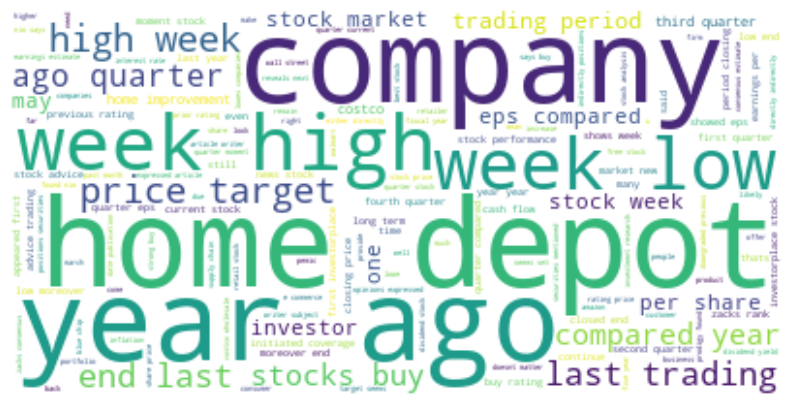

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(background_color='white').generate(' '.join(all_words))

# Plot word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Name entity recognition 

In [34]:
import spacy
from collections import Counter

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en_core_web_sm")

def extract_named_entities(text):
    # Process whole documents
    doc = nlp(text)

    # Analyze syntax
    named_entities = [chunk.text for chunk in doc.ents]
    return named_entities

# Apply the function to the 'Article' column
df['named_entities'] = df['Article'].apply(extract_named_entities)

# Print the first few rows of the DataFrame to see the named entities
print(df.head())

# Count the frequency of each named entity
named_entity_freq = Counter([ne for nes in df['named_entities'] for ne in nes])

# Print the 10 most common named entities
print(named_entity_freq.most_common(10))


                       Source   
0  Markets Insider Automation  \
1               InvestorPlace   
2                       Zacks   
3                       Zacks   
4                       Zacks   

                                                Link   
0  https://markets.businessinsider.com/news/stock...  \
1  https://markets.businessinsider.com/news/stock...   
2  https://markets.businessinsider.com/news/stock...   
3  https://markets.businessinsider.com/news/stock...   
4  https://markets.businessinsider.com/news/stock...   

                                               Title   
0  costco wholesale hosts conference call for inv...  \
1  7 inflation proof stocks to buy for more bank ...   
2  costco cost flat as market gains what you shou...   
3  the zacks analyst blog highlights exxon mobil ...   
4  top analyst reports for exxon mobil costco act...   

                                             Article        Date   
0  the company costco wholesale is set to host in...  2023-

In [35]:
df.head()

,Source,Link,Title,Article,Date,tokens_column,lemmas,word_count,unique_word_count,mean_word_length,predicted_topic,predicted_score,doc_len,tokens,sentiment,named_entities
0,Markets Insider Automation,https://markets.businessinsider.com/news/stock...,costco wholesale hosts conference call for inv...,the company costco wholesale is set to host in...,2023-05-10,"['company', 'costco', 'wholesale', 'set', 'hos...",company costco wholesale set host investor cli...,112,76,4.705357,FinanceAnalysis,0.719080,112,"[company, costco, wholesale, set, host, invest...",0.060000,"[5252023 44835, 322023investors, httpseventsq4..."
1,InvestorPlace,https://markets.businessinsider.com/news/stock...,7 inflation proof stocks to buy for more bank ...,investorplace stock market news stock advice t...,2023-05-09,"['investorplace', 'stock', 'market', 'news', '...",investorplace stock market news stock advice t...,1485,686,5.371044,FinanceAnalysis,0.505355,1485,"[investorplace, stock, market, news, stock, ad...",0.032594,"[669396costco, 15, 04, 071operationally, three..."
2,Zacks,https://markets.businessinsider.com/news/stock...,costco cost flat as market gains what you shou...,in the latest trading session costco cost clos...,2023-05-09,"['latest', 'trading', 'session', 'costco', 'co...",late trading session costco cost close 49906 m...,586,305,4.875427,FinanceAnalysis,0.647086,586,"[latest, trading, session, costco, cost, close...",-0.012370,"[49906, the previous day, 500s 005, the day, 0..."
3,Zacks,https://markets.businessinsider.com/news/stock...,the zacks analyst blog highlights exxon mobil ...,for immediate releasechicago il may 8 2023 zac...,2023-05-09,"['immediate', 'releasechicago', 'il', 'may', '...",immediate releasechicago il may 8 2023 zacksco...,888,465,5.489865,FinanceAnalysis,0.674216,888,"[immediate, releasechicago, il, may, 8, 2023, ...",0.102662,"[every day, exxon mobil corp xom, costco whole..."
4,Zacks,https://markets.businessinsider.com/news/stock...,top analyst reports for exxon mobil costco act...,friday may 5 2023the zacks research daily pres...,2023-05-06,"['friday', 'may', '5', '2023the', 'zacks', 're...",friday may 5 2023the zack research daily prese...,1121,556,5.583408,FinanceAnalysis,0.532896,1121,"[friday, may, 5, 2023the, zacks, research, dai...",0.080252,"[friday may 5, 2023the zacks research daily, d..."


In [36]:
def extract_named_entities(text):
    doc = nlp(text)
    named_entities = [(chunk.text, chunk.label_) for chunk in doc.ents]
    return named_entities

df['named_entities'] = df['Article'].apply(extract_named_entities)

entity_labels = [label for entities in df['named_entities'] for _, label in entities]
entity_label_freq = Counter(entity_labels)

print(entity_label_freq)


Counter({'DATE': 51506, 'CARDINAL': 50336, 'ORG': 9543, 'PERSON': 5367, 'GPE': 3956, 'MONEY': 3016, 'NORP': 2539, 'ORDINAL': 2153, 'TIME': 769, 'PRODUCT': 510, 'LOC': 463, 'QUANTITY': 447, 'PERCENT': 274, 'FAC': 112, 'LAW': 42, 'WORK_OF_ART': 34, 'EVENT': 30, 'LANGUAGE': 9})


we also extract the entity label. We then count the frequency of each entity label in the dataset. This gives some insights into the types of entities in the dataset

In [38]:
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')

# Process the first article in the dataset
doc = nlp(df['Article'].iloc[0])

# Display the entities found in the article
displacy.render(doc, style='ent', jupyter=True)


In [39]:
import spacy

nlp = spacy.load('en_core_web_sm')

# Process the first article in the dataset
doc = nlp(df['Article'].iloc[0])

# Extract all the sentences and their entities
sentences = list(doc.sents)
entity_pairs = []

for sent in sentences:
    sent_doc = nlp(str(sent)) 
    ents = [(e.text, e.start_char - sent.start_char, e.end_char - sent.start_char, e.label_) for e in sent_doc.ents]
    if len(ents) > 1:
        entity_pairs.append(ents)

# Print all pairs of entities in each sentence
for pair in entity_pairs:
    print(pair)


[('5252023 44835', 86, 99, 'DATE'), ('322023investors', 179, 194, 'CARDINAL'), ('httpseventsq4inccomattendee898459066', 270, 306, 'GPE'), ('932', 351, 354, 'CARDINAL'), ('2020', 365, 369, 'DATE'), ('085', 378, 381, 'CARDINAL'), ('last year', 408, 417, 'DATE'), ('49918', 440, 445, 'CARDINAL'), ('19', 517, 519, 'CARDINAL'), ('35', 523, 525, 'CARDINAL')]
